<div align="center">

  <img alt="Casa Rosada" width="85%" src="img/casa_rosada.png">
  <br>

</div>

## **Projeto 01 - Análise dos Dados do Airbnb - [Buenos Aires, Argentina](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv)**

###### **Data Science na Prática 4.0** [sigmoidal.ai](https://sigmoidal.ai)

*by[Jhefferson Z. Andreatta](https://www.linkedin.com/in/e-jhefferson-zardin-andreatta-8ab67723a/)*

---

<div align="justify" style="text-align: justify;">

## **História, Transformações e Turismo**

Buenos Aires, a capital cosmopolita da Argentina, também conhecida como Cidade Autônoma de Buenos Aires (CABA), é uma das metrópoles mais vibrantes e culturais da América Latina. Esta cidade dinâmica é a maior da Argentina e a segunda maior área metropolitana da América do Sul, atrás apenas da Grande São Paulo. Localizada na costa ocidental do estuário do Rio da Prata, Buenos Aires é um centro econômico, cultural e político vital, com uma população de cerca de 13 milhões de pessoas na sua área metropolitana.

A cidade de Buenos Aires tem uma história rica que remonta à sua fundação original em 1536 e refundação em 1580. Em 1880, após décadas de conflitos políticos, Buenos Aires foi federalizada e separada da província de Buenos Aires, tornando-se um distrito autônomo. Este movimento incluiu a incorporação das cidades de Belgrano e Flores, agora bairros de Buenos Aires. A emenda constitucional de 1994 concedeu autonomia política à cidade, permitindo que os cidadãos elegessem diretamente seu chefe de governo pela primeira vez em 1996. Antes disso, o prefeito era nomeado pelo Presidente da República.

Hoje, Buenos Aires é uma das 20 maiores cidades do mundo e uma das três únicas cidades latino-americanas consideradas uma cidade global alfa, ao lado de São Paulo e Cidade do México. A cidade é conhecida por seus marcos históricos e culturais, como a Praça de Maio, a Casa Rosada, o Teatro Colón e o museu MALBA. Estes locais emblemáticos atraem turistas de todo o mundo, contribuindo para a sua fama global.

Nos últimos anos, a plataforma [Airbnb](https://www.airbnb.com.br/) teve um impacto significativo no turismo de [Buenos Aires](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B4noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv). Fundada em 2008, a Airbnb permite que anfitriões aluguem suas propriedades a curto prazo, oferecendo uma alternativa às redes hoteleiras tradicionais. Em Buenos Aires, essa prática se expandiu rapidamente, especialmente em bairros como Palermo, Recoleta e San Telmo.

A Airbnb transformou a indústria da hospitalidade, oferecendo acomodações mais autênticas e econômicas. No entanto, essa expansão trouxe desafios regulatórios. Embora haja um registro obrigatório de aluguéis temporários em Buenos Aires com cerca de 500 propriedades listadas, a plataforma Inside Airbnb indica que existem mais de 35 mil ofertas na cidade. Esta discrepância levanta questões sobre a legalidade e a regulamentação dos aluguéis temporários.

Por fim, Buenos Aires é uma cidade onde história e modernidade coexistem harmoniosamente. Suas transformações políticas e territoriais, juntamente com a influência de plataformas como o Airbnb, moldaram a cidade contemporânea. Visitar Buenos Aires é uma experiência enriquecedora em qualquer época do ano, com destaque para a primavera e o outono, quando o clima é agradável e as multidões são menores.

Com uma combinação única de cultura, história e inovação, Buenos Aires continua a ser um destino atraente para visitantes de todo o mundo. Por esses motivos, vamos seguir com a análise do [conjunto de dados](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B4noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv) disponibilizados pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

### Obtenção dos Dados

**Para esta análise, usaremos o arquivo `listings.csv` - *Summary information and metrics for listings in... (good for visualisations)*, onde neste *notebook* iremos analisar os dados brutos e extrair insights pertinentes.**

#### **Importante:**
O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B4noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv) exato utilizado neste notebook não esteja mais disponível, o que quebraria nosso código.
</div>

### Instalação das bibliotécas

Inicialmente iremos instalar os pacotes necessários para a ralização dos nossos dados e logo após realizaremos a importação dos mesmos.

* `pandas`: Manipulação e análise de dados tabulares

* `matplotlib`: Criação de gráficos estáticos, animados e interativos

* `seaborn`: Visualização de dados estatísticos

* `yfinance`: Download de dados financeiros históricos do Yahoo Finance

* `folium`: Criação de mapas interativos

In [1]:
# Instalando pacotes necessários
!pip install numpy pandas seaborn yfinance matplotlib folium -q

In [2]:
# Importar os pacotes necessários
import folium
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime

warnings.filterwarnings('ignore')

# Configurando a Visualização
sns.set_style()

# Para exibir gráficos inline no Jupyter Notebook
%matplotlib inline

### Importação dos Dados

Vamos começar importando o arquivo em formato `.csv` contendo os dados necessários para nossa análise.

In [3]:
# Importar o arquivo listings.csv para um DataFrame
DATA_PATH = 'https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv'
df = pd.read_csv(DATA_PATH)

### Análise Exploratória

Seguindo nossa análise, precisamos obter uma dimensão do nosso DataFrame. Para isso, utilizaremos as funções `shape` e `dtypes`. Essas funções nos ajudarão a entender o tamanho do nosso DataFrame, informando o número de variáveis (colunas), o número de entradas (linhas) e o tipo de cada variável.

In [4]:
# Identificar o volume de dados e a forma do DataFrame
print('Tamanho do DataFrame:')
print('-->  {} linhas.'.format(df.shape[0]))
print('-->  {} colunas.'.format(df.shape[1]))

# Verificar os tipos de variáveis
print('\nTipos de variáveis: \n{}'.format(df.dtypes))

Tamanho do DataFrame:
-->  37035 linhas.
-->  18 colunas.

Tipos de variáveis: 
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


**Para uma análise inicial da estrutura do DataFrame, vamos chamar as funções `head` e `tail`. Essas funções nos permitem verificar as cinco primeiras entradas e as cinco últimas saídas, respectivamente.**

In [5]:
# Verificando nosso 'dataframe' analisando as primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,61788.0,3,41,2024-04-22,0.28,1,338,5,NaN
1,186005,Modern apartment in Downtown Buenos Aires,893209,Victoria,NaN,Retiro,-34.59804,-58.37688,Entire home/apt,63737.0,7,85,2023-10-28,0.56,4,293,8,NaN
2,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,16032.0,7,119,2024-06-12,0.82,7,13,11,NaN
3,188154,At the heart of San Telmo Double,906277,Magdalena,NaN,San Telmo,-34.62063,-58.36967,Private room,22763.0,2,80,2024-03-09,0.53,6,330,7,NaN
4,48535,Elegant apartment in downtown Bs.As,221044,Florencia,NaN,Retiro,-34.59620,-58.37529,Entire home/apt,45526.0,90,0,NaN,NaN,1,364,0,NaN


In [6]:
# Verificando nosso 'dataframe' analisando as últimas saídas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
37030,1186706513858905394,Luminosa y Cerca de todo,5741869,Ramiro,NaN,Belgrano,-34.546853,-58.450930,Entire home/apt,154789.0,7,0,NaN,NaN,3,364,0,NaN
37031,1188581546522211306,Departamento en Palermo Soho,140615013,Florencia,NaN,Palermo,-34.584131,-58.425125,Entire home/apt,29137.0,3,0,NaN,NaN,2,26,0,NaN
37032,1188588226059760197,Departamento Céntrico en Almagro,570638329,Urban,NaN,Almagro,-34.611896,-58.418361,Entire home/apt,29137.0,1,0,NaN,NaN,2,365,0,NaN
37033,1188641321963525515,Apart Blue,583844736,Marisa,NaN,Palermo,-34.586910,-58.431540,Entire home/apt,32779.0,1,0,NaN,NaN,1,365,0,NaN
37034,1188643514120718632,Hermoso departamento en Palermo,505709984,Jerónimo,NaN,Palermo,-34.587563,-58.428171,Entire home/apt,21124.0,1,0,NaN,NaN,2,363,0,NaN


### Dicionário das Variáveis

Vamos agora listar as colunas do DataFrame e contextualizar cada uma delas, facilitando a compreensão dos dados apresentados.

* `id` - Identificador único de cada imóvel

* `name` - Nome do imóvel anunciado

* `host_id` - Identificador único de cada usuário

* `host_name` - Nome do usuário

* `neighbourhood_group` - Grupo de bairros

* `neighbourhood` - Vizinhança

* `latitude` - Coordenada da latitude do imóvel

* `longitude` - Coordenada da longitude do imóvel

* `room_type` - Tipo de imóvel ofertado

* `price` - Valor da diária

* `minimum_nights` - Quantidade mínima de noites para aluguel

* `number_of_reviews` - Número de avaliações recebidas

* `last_review` - Data da última avaliação

* `reviews_per_month` - Avaliações recebidas por mês

* `calculated_host_listings_count` - Número de imóveis do mesmo anfitrião

* `availability_365` - Dias de disponibilidade em um ano

* `number_of_reviews_ltm` - Avaliações nos últimos 12 meses

* `license` - Número de registro do imóvel

Sabendo quais são as nossas colunas, suas funções e que o nosso DataFrame possui mais de 37 mil linhas e 18 colunas, vamos agora verificar a quantidade de dados ausentes que ele contém.

Antes de prosseguir, vou realizar uma cópia do DataFrame original para garantir que ele permaneça inalterado, caso seja necessário utilizá-lo em uma futura análise.

In [7]:
# Realizando cópia do DataFrame original
df_clean = df.copy()

**Feita a cópia vamos continuar nossa análise visualizando a porcentagem de valores ausentes em cada coluna do dataframe**

In [8]:
# Ordena em ordem decrescente as variáveis por seus valores ausentes
(df_clean.isnull().sum().sort_values(ascending=False) / df_clean.shape[0]) * 100

neighbourhood_group               100.000000
license                            98.838936
reviews_per_month                  19.643580
last_review                        19.643580
price                               8.181450
host_name                           0.005400
name                                0.000000
id                                  0.000000
neighbourhood                       0.000000
host_id                             0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
dtype: float64

Verificando o resultado acima, identificamos cinco colunas com valores ausentes, destacando-se:

- `neighbourhood_group`, que indica o grupo de bairros (100% de valores ausentes),
- `license`, que é o número de registro do imóvel (98% de valores ausentes), e
- `last_review`, que representa a data da última avaliação.

Essas três colunas possuem baixo poder preditivo e uma grande quantidade de dados ausentes, portanto, serão excluídas do DataFrame.

As outras colunas com valores ausentes são:
- `reviews_per_month` (quantidade de avaliações recebidas por mês),
- `price` (valor da diária), e
- `host_name` (nome do usuário).

Essas colunas serão tratadas posteriormente.

In [9]:
# Excluir as colunas 'neighbourhood_group', 'last_review' e 'license'
df_clean.drop(columns=['neighbourhood_group', 'last_review', 'license'], inplace=True)

### Análise Estatística Detalhada

Na análise estatística, os detalhes das variáveis tornam-se ainda mais evidentes. Essa análise detalhada nos permite entender melhor a distribuição dos dados e identificar possíveis anomalias ou outliers.

In [10]:
# Ver resumo estatístico das variáveis numéricas
df_clean[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
            'number_of_reviews_ltm', 'calculated_host_listings_count']].describe()

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count
count,3.400500e+04,37035.000000,37035.000000,37035.000000,29760.000000,37035.000000,37035.000000
mean,6.609650e+04,5.553665,212.046848,23.614041,1.346114,9.843391,18.405697
std,9.195022e+05,23.318454,117.829793,40.531072,1.328470,14.253768,41.031330
min,2.600000e+02,1.000000,0.000000,0.000000,0.010000,0.000000,1.000000
25%,2.276300e+04,1.000000,104.000000,1.000000,0.380000,0.000000,1.000000
50%,3.163200e+04,2.000000,236.000000,8.000000,0.970000,4.000000,2.000000
75%,4.552600e+04,3.000000,328.000000,29.000000,1.950000,14.000000,13.000000
max,9.105257e+07,1000.000000,365.000000,851.000000,43.520000,600.000000,268.000000


Para iniciar a limpeza e ordenação do nosso DataFrame, devemos primeiro corrigir o preço dos aluguéis, que apresenta valores elevados na notação "e+07". Isso indica que os preços podem estar muito altos ou que a unidade de moeda pode não estar clara. Para confirmar a moeda utilizada no [dataset](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv), é preciso consultar o site [Inside Airbnb](https://insideairbnb.com/buenos-aires/) e verificar a moeda no dataset. Precisamos converter esses valores para Dólares Americanos.

Para isso, utilizaremos a biblioteca `yfinance` para importar a cotação atual do Peso Argentino em relação ao Dólar Americano e, assim, converter a coluna `price` para dólares.

In [11]:
# Importando a cotação atual da moeda 'ARSUSD=X' com Yahoo Finance
arsusd = yf.download('ARSUSD=X', start=datetime.now())['Adj Close']
arsusd = arsusd.iloc[0]

# Converter o preço para dólares
df_clean['price'] = df_clean['price'] * arsusd

[*********************100%%**********************]  1 of 1 completed


**Após a econversão dos valores da `price`, vamos realizar uma nova análise estatica das variáveis numéricas.**

In [12]:
# Ver resumo estatístico das variáveis numéricas - 'price' em dólar
df_clean[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
            'number_of_reviews_ltm', 'calculated_host_listings_count']].describe()

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count
count,34005.000000,37035.000000,37035.000000,37035.000000,29760.000000,37035.000000,37035.000000
mean,71.517031,5.553665,212.046848,23.614041,1.346114,9.843391,18.405697
std,994.909944,23.318454,117.829793,40.531072,1.328470,14.253768,41.031330
min,0.281322,1.000000,0.000000,0.000000,0.010000,0.000000,1.000000
25%,24.629777,1.000000,104.000000,1.000000,0.380000,0.000000,1.000000
50%,34.226118,2.000000,236.000000,8.000000,0.970000,4.000000,2.000000
75%,49.259555,3.000000,328.000000,29.000000,1.950000,14.000000,13.000000
max,98519.730639,1000.000000,365.000000,851.000000,43.520000,600.000000,268.000000


Agora é possível verificar com mais clareza os valores cobrados por diárias, facilitando a visualização de *outliers*. Por exemplo, na coluna `price`, há valores que ultrapassam 97 mil dólares.

Na coluna `minimum_nights`, também identificamos *outliers*, como números mínimos de diárias que excedem 1000, o que pode indicar erros ou anomalias nos dados.

Além disso, é possível identificar através da linha 'count' que existem dados ausentes nas colunas `price` e `reviews_per_month`, pois essas colunas têm contagens diferentes das demais.

Para tratar esses dados ausentes, vamos substituir os valores ausentes pela média do bairro ao qual o imóvel pertence. Isso ajudará a manter um equilíbrio tanto na coluna `price` quanto na `reviews_per_month`.

#### Price - Preencher os valores ausentes Média correspondente a do Bairro

In [13]:
# Calcular a média de 'price' agrupada por 'neighbourhood'
price_mean = df_clean.groupby('neighbourhood')['price'].transform('mean')

# Preencher os valores ausentes com a média correspondente do bairro
df_clean['price'] = df_clean['price'].fillna(price_mean)

#### Reviews per Month - Preencher os valores ausentes Média correspondente a do Bairro

In [14]:
# Calcular a média de 'reviews_per_month' agrupada por 'neighbourhood'
reviewspermonth_mean = df_clean.groupby('neighbourhood')['reviews_per_month'].transform('mean')

# Preencher os valores ausentes com a média correspondente do bairro
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(reviewspermonth_mean)

In [15]:
# Verificando o Resultado
df_clean.isna().sum().sort_values(ascending=False)

reviews_per_month                 5
host_name                         2
price                             1
host_id                           0
neighbourhood                     0
name                              0
id                                0
longitude                         0
latitude                          0
minimum_nights                    0
room_type                         0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

**Verificando o resultado dos procedimentos acima, identificamos que ainda existem alguns dados ausentes. No entanto, como são poucas linhas, vamos optar por excluir essas linhas restantes.**

In [16]:
# Excluindo entradas com dados faltantes
df_clean.dropna(axis=0, inplace=True)

# Verificando o Resultado Final
df_clean.isna().sum().sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### Limpando Outliers

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar os histogramas, boxplots e calcular os limites utilizando a regra do IQR Score.

#### Análise das Variáveis na Distribuição Estatística

In [17]:
# Verificando a Distribuição Estatística
df_clean[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
            'number_of_reviews_ltm', 'calculated_host_listings_count']].describe().round(2)

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count
count,37028.00,37028.00,37028.00,37028.00,37028.00,37028.00,37028.00
mean,71.40,5.55,212.07,23.62,1.34,9.85,18.41
std,953.55,23.32,117.82,40.53,1.20,14.25,41.03
min,0.28,1.00,0.00,0.00,0.01,0.00,1.00
25%,25.62,1.00,104.00,1.00,0.50,0.00,1.00
50%,35.33,2.00,236.00,8.00,1.12,4.00,2.00
75%,53.76,3.00,328.00,29.00,1.70,14.00,13.00
max,98519.73,1000.00,365.00,851.00,43.52,600.00,268.00


**Na representação das variáveis na análise estatística, observamos alguns detalhes importantes:**

* `price`: Apresenta um valor mínimo próximo de 0 e um valor máximo de 100 mil dólares.

* `minimum_nights`: Possuem alguns registros com um número mínimo de pelo menos 1000 noites, o que é extremamente elevado. Dado que o terceiro quartil (75%) está em 3 noites, isso indica um erro ou uma anomalia nos dados.

Vamos revisar e tratar esses valores extremos para garantir que não distorçam a análise. No entanto, as demais variáveis podem conter outliers, mas não vamos nos preocupar com elas nesta análise.

#### Análise das Variáveis nos Histogramas

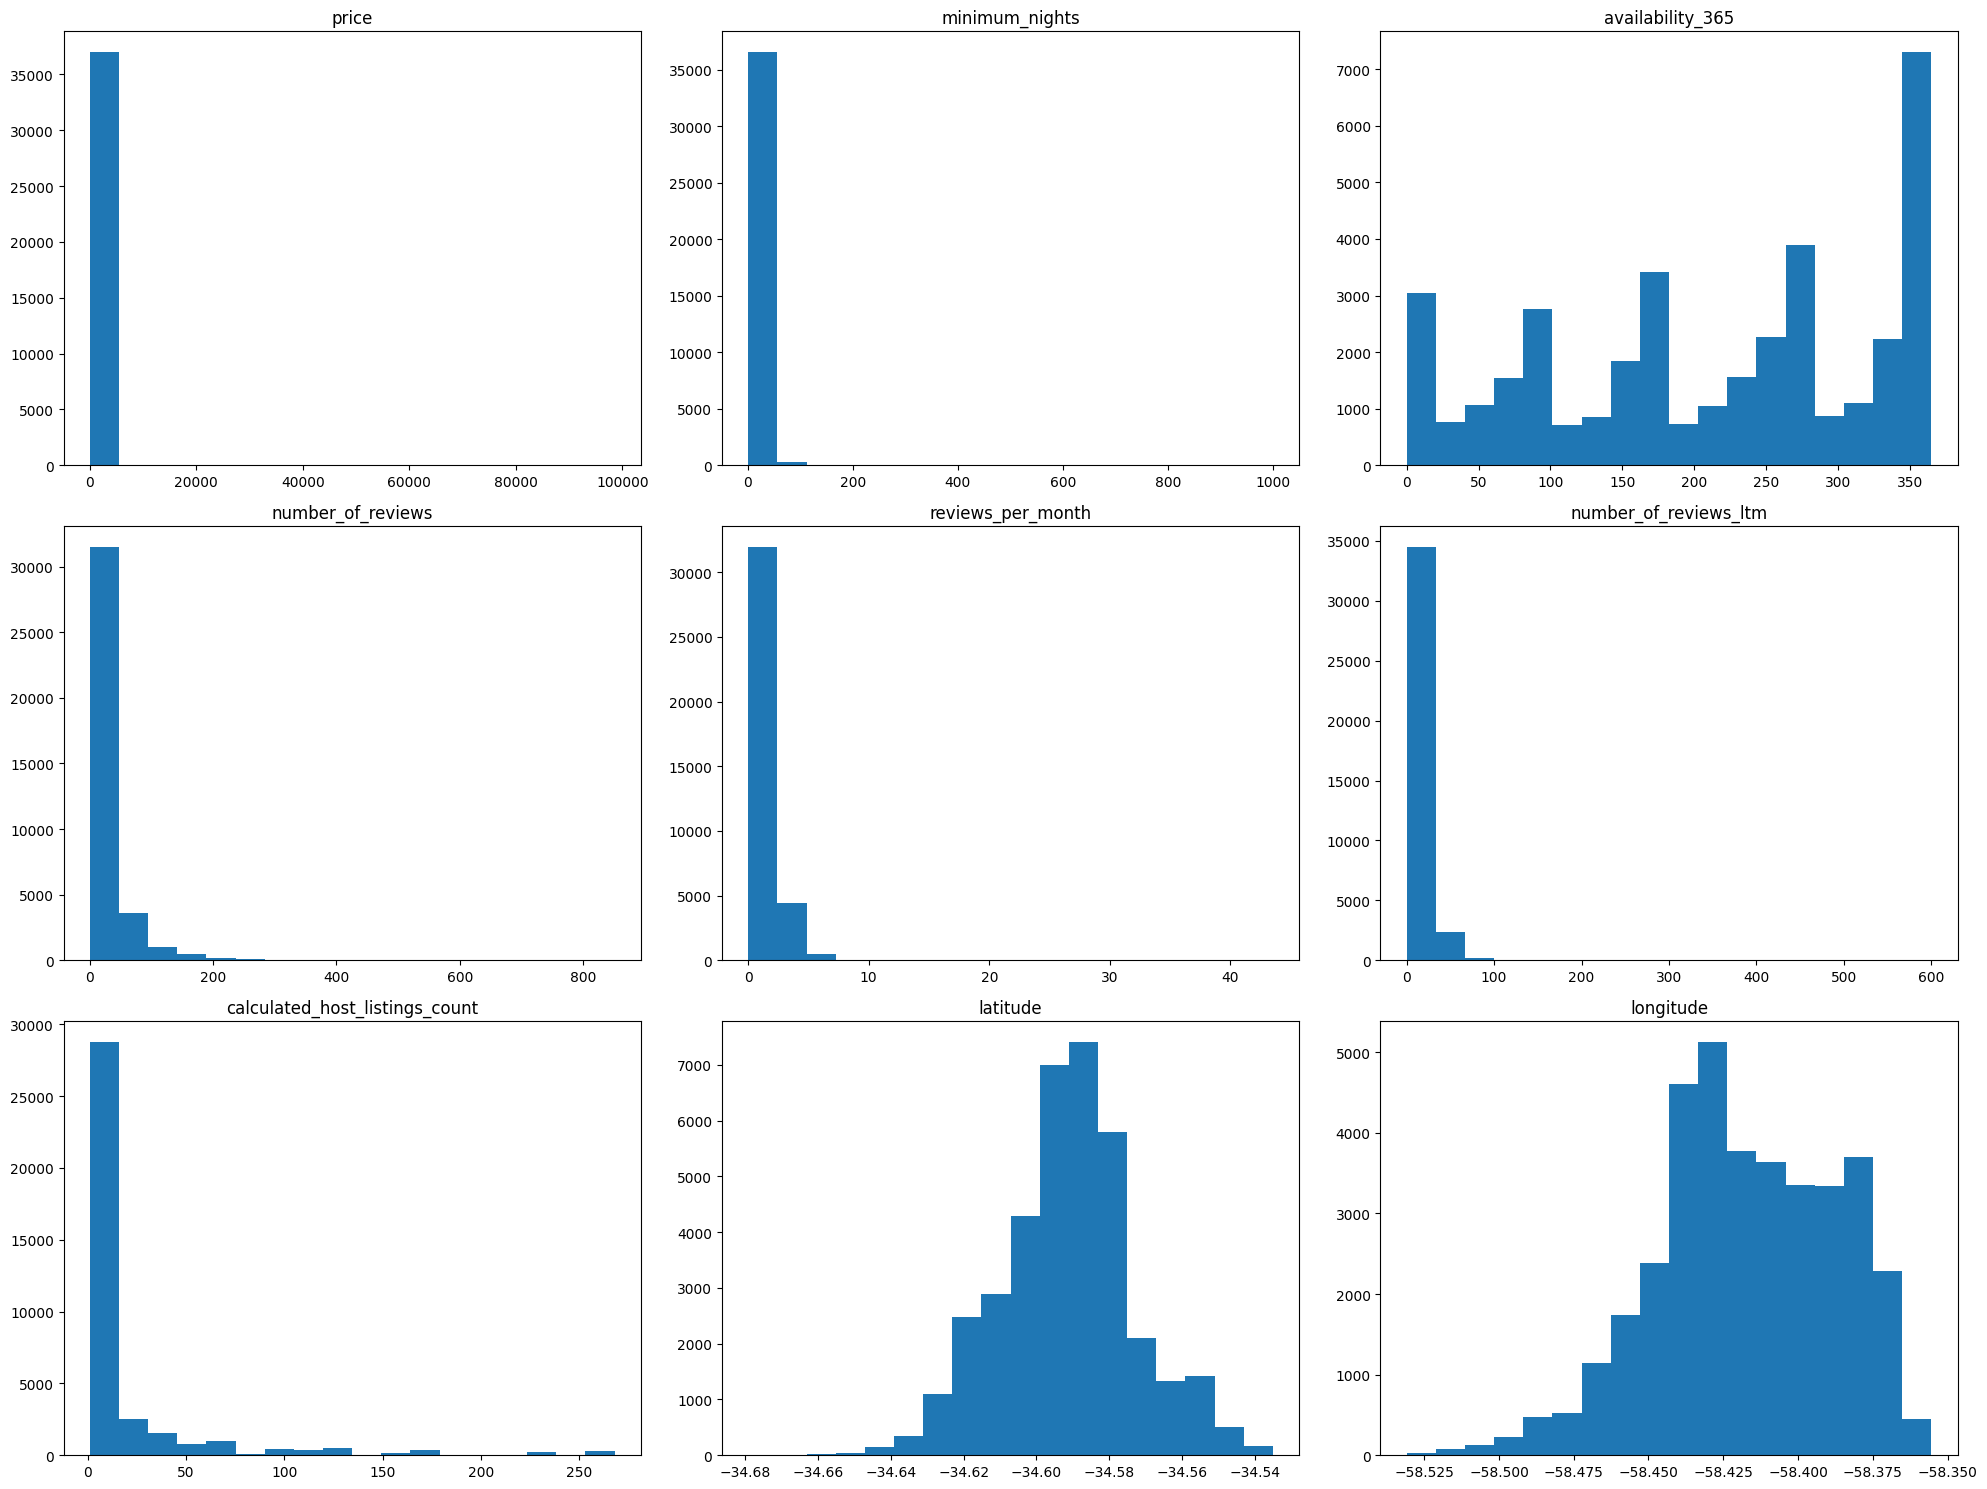

In [18]:
# Plotar o histograma das variáveis numéricas
df_clean.hist(column=['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
                        'number_of_reviews_ltm', 'calculated_host_listings_count', 'latitude', 'longitude'], 
                        bins=18, figsize=(20, 15), grid=False)

plt.tight_layout()

Como já verificado anteriormente na análise estatística e agora nos histogramas, conseguimos ver mais claramente que temos *outliers* presentes.

Para tratar esses *outliers*, começaremos com a variável `price` e depois a variável `minimum_nights`.

Vamos calcular para cada uma o IQR (Intervalo Interquartil) e definir os limites inferior e superior utilizando os quartis Q1 e Q3.

In [19]:
# Outliers para Variável 'price'
price_q1 = df_clean['price'].quantile(.25)
price_q3 = df_clean['price'].quantile(.75)
IQR_price = price_q3 - price_q1
print('IQR da variável "price": ', IQR_price)

# Definindo Limites
lmt_sup_price = price_q3 + 1.5 * IQR_price
lmt_inf_price = price_q1 - 1.5 * IQR_price

print('Limite superior de "price": ', lmt_sup_price)
print('Limite inferior de "price": ', lmt_inf_price)

IQR da variável "price":  28.140454229401946
Limite superior de "price":  95.9666234249402
Limite inferior de "price":  -16.595193492667605


In [20]:
# Outliers para Variável 'minimum_nights'
minimum_nights_q1 = df_clean['minimum_nights'].quantile(.25)
minimum_nights_q3 = df_clean['minimum_nights'].quantile(.75)
IQR_minimum_nights = minimum_nights_q3 - minimum_nights_q1
print('IQR da variável "minimum_nights": ', IQR_minimum_nights)

# definindo os limites                                       
lmt_sup_minimum_nights = minimum_nights_q3 + 1.5 * IQR_minimum_nights
lmt_inf_minimum_nights = minimum_nights_q1 - 1.5 * IQR_minimum_nights

print('Limite superior de "minimum_nights": ', lmt_sup_minimum_nights)
print('Limite inferior de "minimum_nights": ', lmt_inf_minimum_nights)

IQR da variável "minimum_nights":  2.0
Limite superior de "minimum_nights":  6.0
Limite inferior de "minimum_nights":  -2.0


Definidos os intervalos interquartis e seus respectivos limites superiores e inferiores, vamos plotar os boxplots de cada variável para que possamos entender melhor suas distribuições e identificar os outliers.

O dataframe possui 37028 entradas (linhas).
2652 entradas então acima de 95.16 dólares.
Representam portanto 7.16% do dataframe.



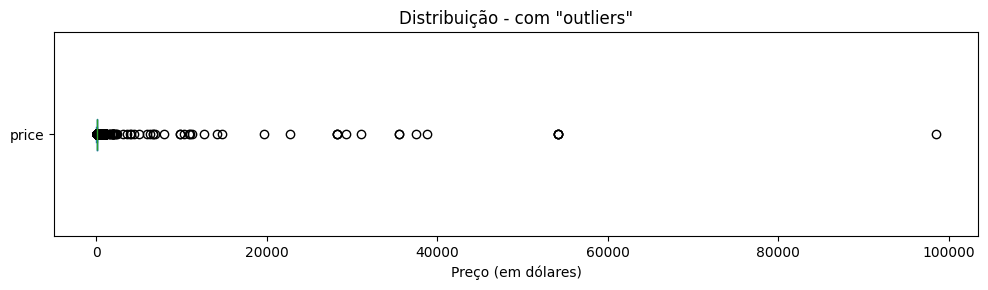

In [21]:
# Print das Informações Necessárias
print("O dataframe possui {} entradas (linhas).".format(df_clean.shape[0]))
print("{} entradas então acima de 95.16 dólares.".format(len(df_clean[df_clean['price'] > 95.16])))
print("Representam portanto {:.2f}% do dataframe.\n".format((len(df_clean[df_clean['price'] > 95.16]) / df_clean.shape[0]) * 100))

# Plotar boxplot da 'price' - antes da exclusão dos outliers
df_clean['price'].plot(kind='box', vert=False, figsize=(10, 3))
plt.title('Distribuição - com "outliers"')
plt.xlabel('Preço (em dólares)')

plt.tight_layout()

O dataframe possui 37028 entradas (linhas).
4405 entradas então acima de 6.0 dólares.
Representam portanto 11.90% do dataframe.



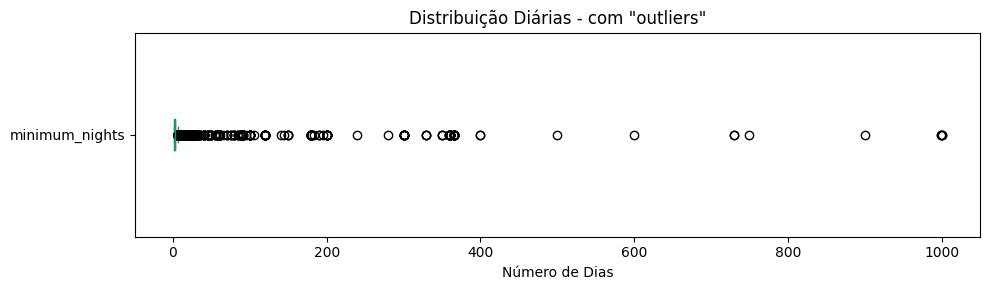

In [22]:
# Print das Informações Necessárias
print("O dataframe possui {} entradas (linhas).".format(df_clean.shape[0]))
print("{} entradas então acima de 6.0 dólares.".format(len(df_clean[df_clean['minimum_nights'] > 6.0])))
print("Representam portanto {:.2f}% do dataframe.\n".format((len(df_clean[df_clean['minimum_nights'] > 6.0]) / df_clean.shape[0]) * 100))

# Plotar boxplot da 'minimum_nights' - antes da exclusão dos outliers
df_clean['minimum_nights'].plot(kind='box', vert=False,figsize=(10, 3))
plt.title('Distribuição Diárias - com "outliers"')
plt.xlabel('Número de Dias')

plt.tight_layout()

Após a verificação dos outliers que irão afetar as análises seguintes, vamos realizar a exclusão destes, seguindo os critérios abaixo:

* Limite superior de price em 94.90 dólares.

* Limite superior de minimum_nights em 6.0 diárias.

* Exclusão de imóveis com valores inferiores a 75% da média dos imóveis pertencentes ao Q1.

In [23]:
# Realizando a Limpeza
mean_price_Q1 = df_clean[df_clean['price'] <= price_q1]['price'].mean() * 0.75

df_clean.drop(df_clean[df_clean['price'] <= mean_price_Q1].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['price'] > 95.16].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > 6.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: {}'.format(df.shape))
print('Shape após a limpeza: {}'.format(df_clean.shape))

Shape antes da limpeza: (37035, 18)
Shape após a limpeza: (29322, 15)


Após nossa análise e tratamento dos dados ausentes, bem como a exclusão dos *outliers*, aproximadamente 8 mil linhas foram removidas de um DataFrame que originalmente possuía pouco mais de 37 mil linhas, representando uma exclusão de 21% dos dados. Agora, temos um conjunto de dados limpo e que consideramos confiável.

Vamos visualizar como ficaram os boxplots e histogramas após a exclusão dessas linhas.

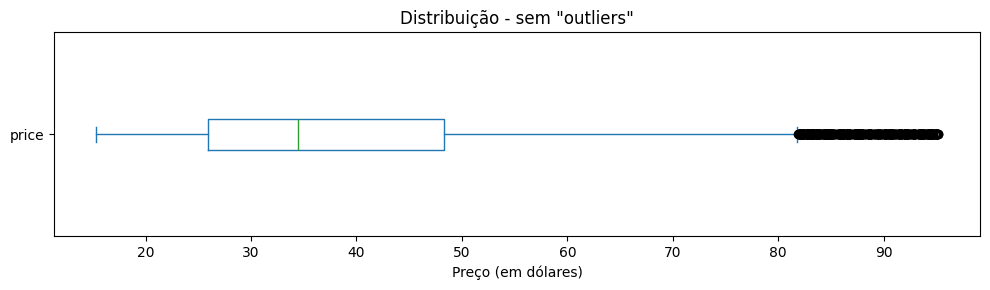

In [24]:
# Plotar boxplot da 'price' - sem os outliers
df_clean['price'].plot(kind='box', vert=False, figsize=(10, 3))
plt.title('Distribuição - sem "outliers"')
plt.xlabel('Preço (em dólares)')

plt.tight_layout()

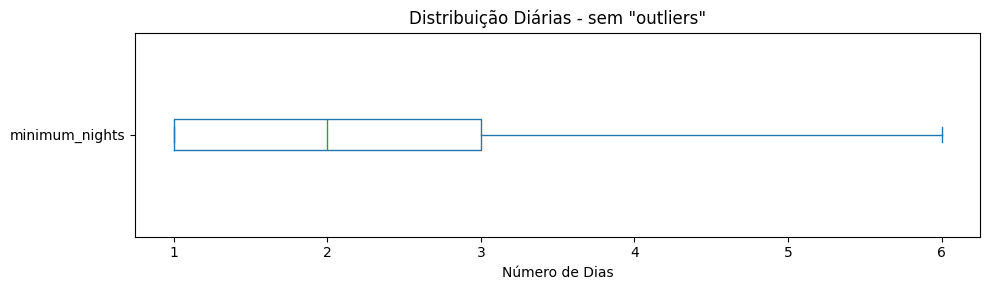

In [25]:
# Plotar boxplot da 'minimum_nights' - sem os outliers
df_clean['minimum_nights'].plot(kind='box', vert=False,figsize=(10, 3))
plt.title('Distribuição Diárias - sem "outliers"')
plt.xlabel('Número de Dias')

plt.tight_layout()

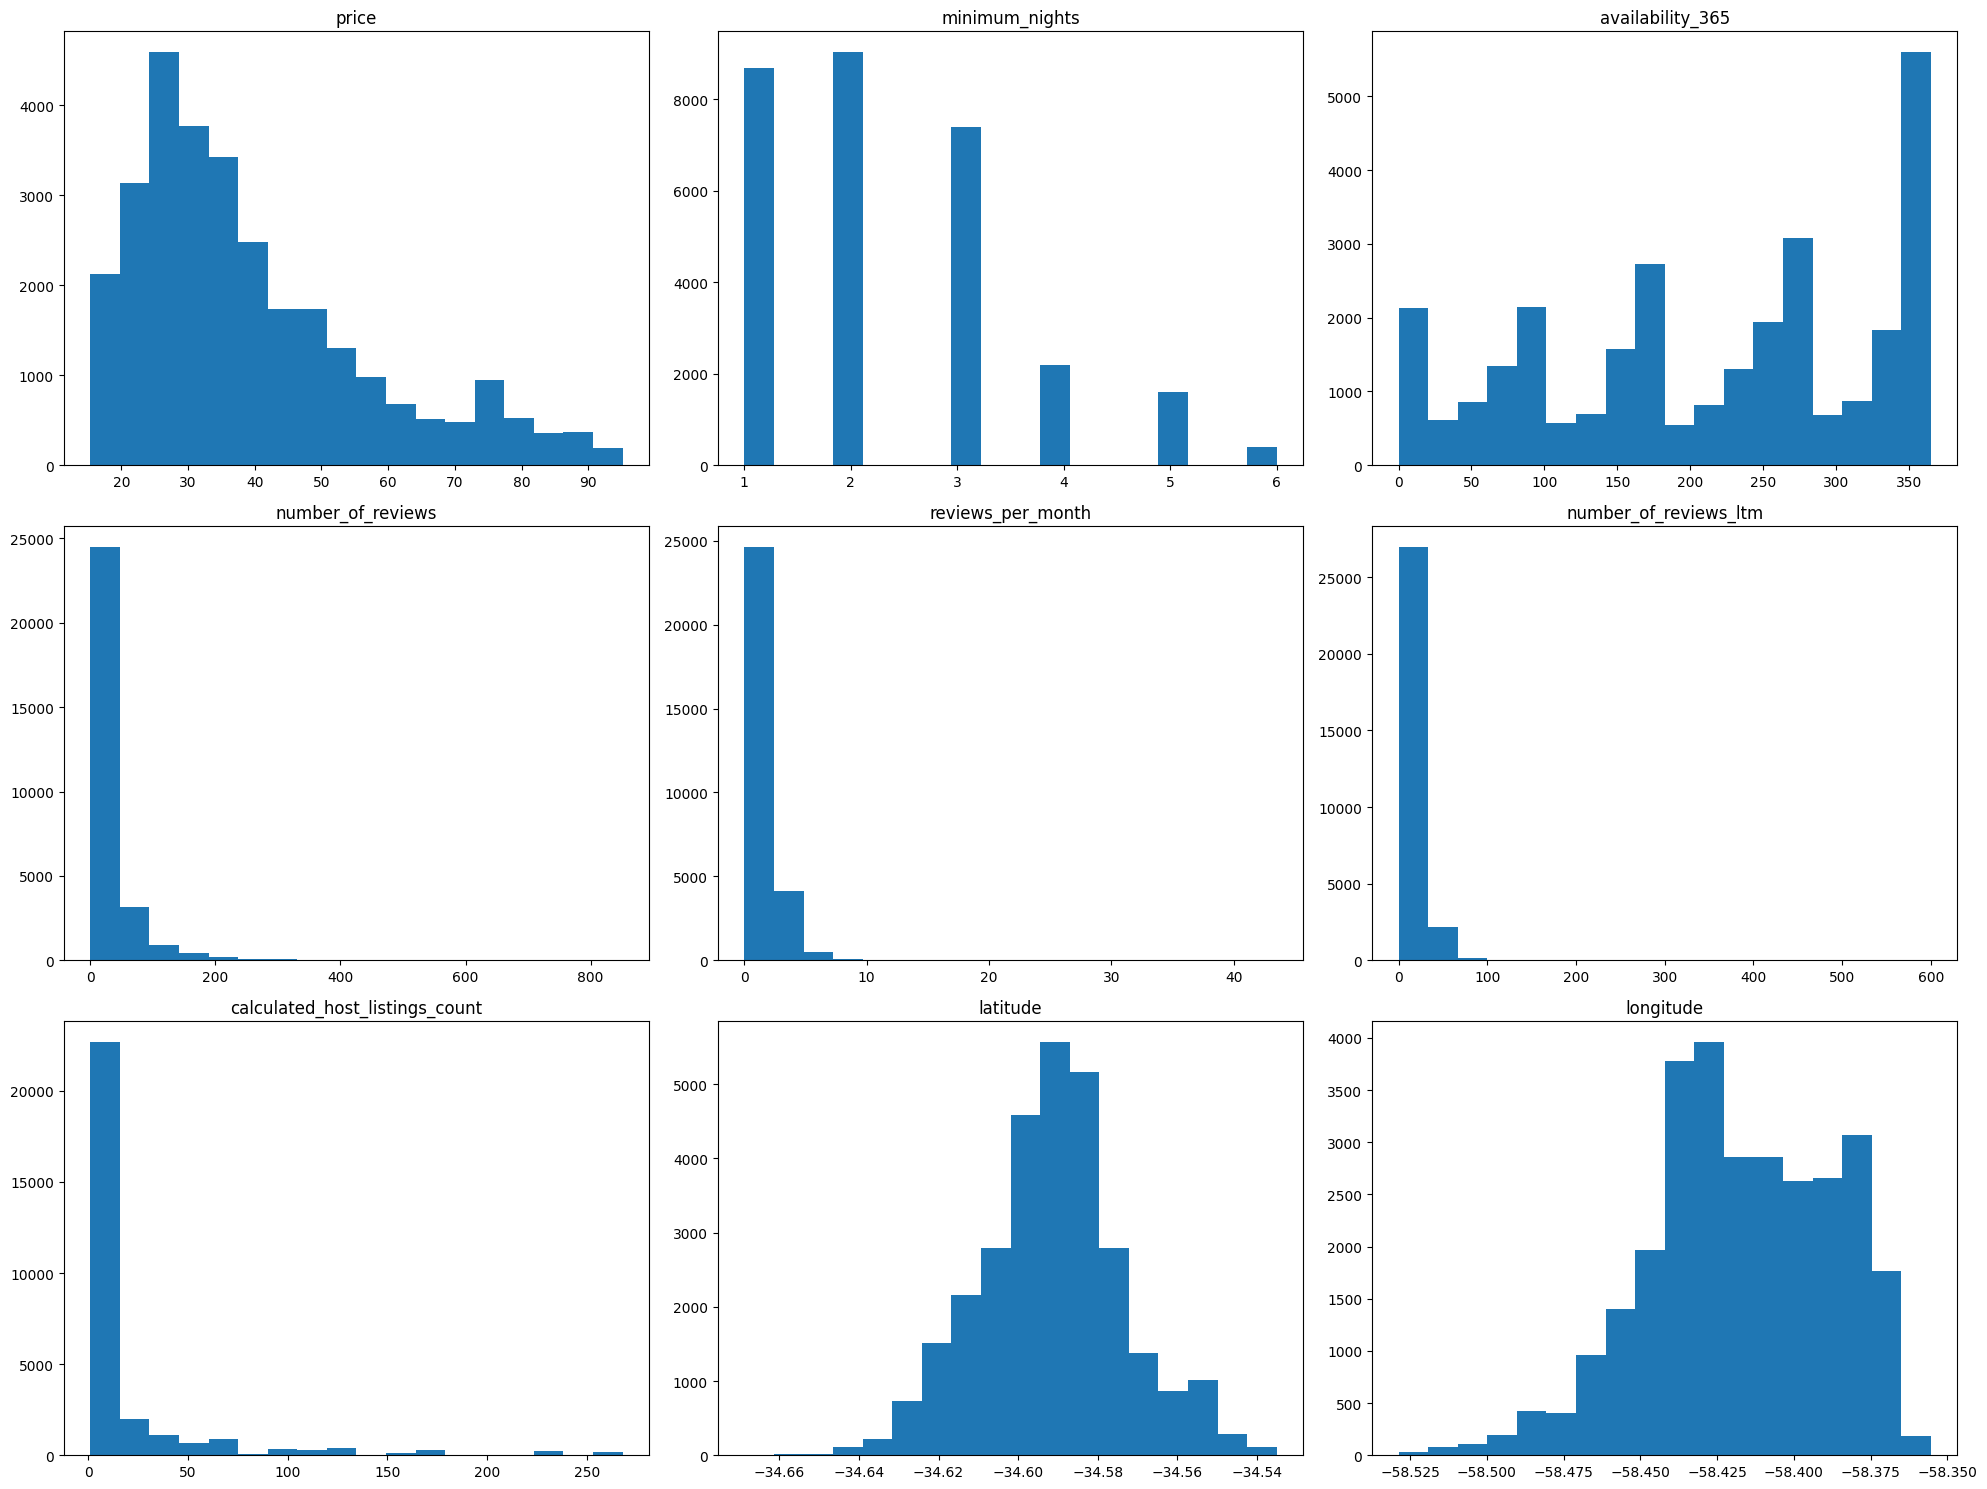

In [26]:
# Histograma das variáveis numéricas após a exclusão dos outliers
df_clean.hist(column=['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
                        'number_of_reviews_ltm', 'calculated_host_listings_count', 'latitude', 'longitude'], 
                        bins=18, figsize=(20, 15), grid=False)

plt.tight_layout()

In [27]:
# Ver resumo estatístico das variáveis numéricas
df_clean[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month', 
            'number_of_reviews_ltm', 'calculated_host_listings_count']].describe()

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count
count,29322.000000,29322.000000,29322.000000,29322.000000,29322.000000,29322.000000,29322.000000
mean,39.271592,2.324637,212.699645,25.757111,1.443732,11.091911,18.886024
std,17.625449,1.206046,115.863265,42.656089,1.249395,15.000339,41.483465
min,15.339646,1.000000,0.000000,0.000000,0.010000,0.000000,1.000000
25%,25.901138,1.000000,110.000000,2.000000,0.600000,1.000000,1.000000
50%,34.481472,2.000000,237.000000,10.000000,1.180552,5.000000,3.000000
75%,48.274926,3.000000,326.000000,32.000000,1.860000,17.000000,13.000000
max,95.139995,6.000000,365.000000,851.000000,43.520000,600.000000,268.000000


Como é possivel ver, ainda temos possiveis *outliers* nas variáveis `availability_365`, `number_of_reviews`, `reviews_per_month` e `number_of_reviews_ltm`, mas no momento não nos preucuparemos com eles, pois a seguir vamos realizar outras análises para descobrir detalhes importantes, como:

* Correlação existente entre as variáveis;

* Tipo de imóvel mais alugado no Airbnb;

* Média e mediana dos preços de aluguéis;

* Localidade mais cara do DataFrame;

* Média do mínimo de noites para aluguel;

* Visualização Geoespacial dos Imóveis.

#### **Correlação entre Variáveis**

Para compreender as relações entre as variáveis, calculamos a matriz de correlação. Essa matriz oferece uma visão geral de como as variáveis estão inter-relacionadas, indicando a presença de correlações positivas ou negativas entre elas.

In [28]:
# Criar uma matriz de correlação
df_corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# Mostrar a matriz de correlação
df_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.044670,-0.035530,-0.114210,0.020556,-0.069071,-0.093385
minimum_nights,0.044670,1.000000,-0.027963,-0.210422,-0.118526,-0.097305,-0.109556
number_of_reviews,-0.035530,-0.027963,1.000000,0.430717,-0.002582,0.044901,0.648060
reviews_per_month,-0.114210,-0.210422,0.430717,1.000000,0.059681,0.024002,0.776878
calculated_host_listings_count,0.020556,-0.118526,-0.002582,0.059681,1.000000,0.160835,0.052456
availability_365,-0.069071,-0.097305,0.044901,0.024002,0.160835,1.000000,0.054144
number_of_reviews_ltm,-0.093385,-0.109556,0.648060,0.776878,0.052456,0.054144,1.000000


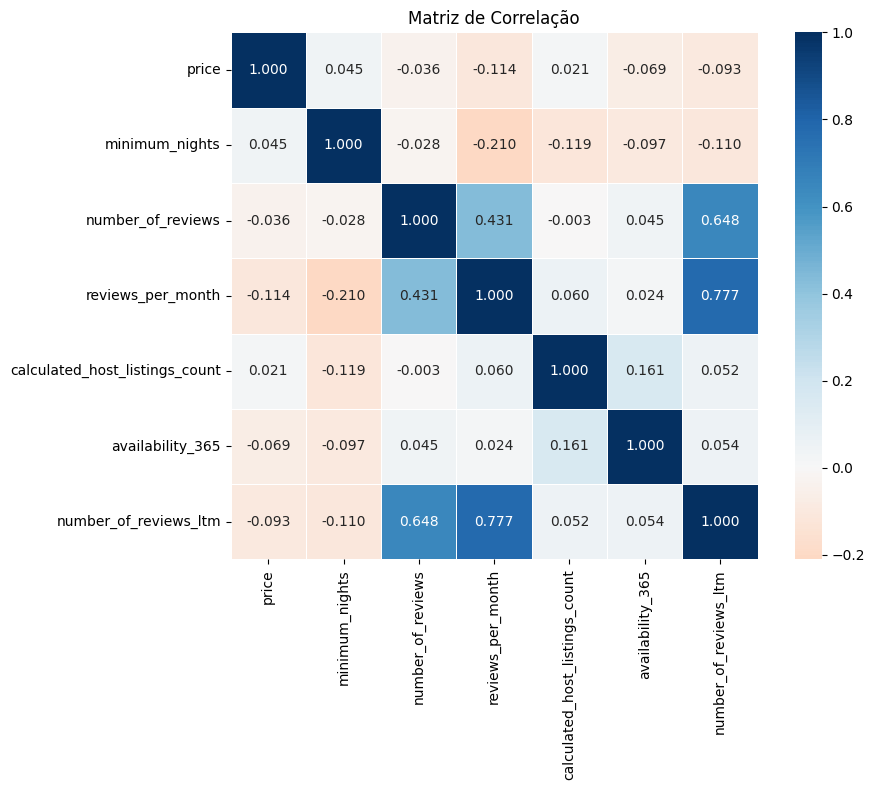

In [29]:
# Plotar um heatmap a partir das correlações
plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, 
            annot=True, 
            fmt='.3f', 
            cmap='RdBu', 
            center=0, 
            linewidths=0.5, 
            linecolor='white', 
            square=True)

plt.title('Matriz de Correlação')

plt.tight_layout()

#### **Tipo de Imóvel Mais Alugado no Airbnb**

Para identificar o tipo de imóvel mais alugado e sua distribuição, utilizamos o seguinte código que mostra o número total e a porcentagem de cada tipo de imóvel disponível no dataframe, ajudando a entender a preferência dos usuários e a oferta disponível.

In [30]:
# Mostrar a quantidade de cada tipo de imóvel disponível
print('Imóveis disponíveis para aluguel: {}'.format(df_clean['room_type'].value_counts().to_string()))

Imóveis disponíveis para aluguel: room_type
Entire home/apt    27470
Private room        1745
Shared room           73
Hotel room            34


In [31]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
print('Porcentagens de imóveis disponíveis para aluguel: {}'.format(((
                                        df_clean['room_type'].value_counts() / df_clean.shape[0]) * 100).to_string()))

Porcentagens de imóveis disponíveis para aluguel: room_type
Entire home/apt    93.683923
Private room        5.951163
Shared room         0.248960
Hotel room          0.115954


#### **Média dos Preços de Aluguéis**

Para obter uma visão mais detalhada sobre a distribuição dos preços dos imóveis para aluguel, vamos verificar a média, a mediana e, por fim, a média de preços por bairro em Buenos Aires. Agrupamos os dados pelo campo `neighbourhood` e calculamos a média dos preços para cada bairro. Este passo nos ajuda a identificar quais bairros possuem os preços médios mais altos e mais baixos, permitindo uma análise mais direcionada sobre os custos-benefícios de alugar um imóvel em diferentes regiões da cidade.

In [32]:
# Ver a média dos preços de aluguéis
print('Média dos preços de aluguéis - Buenos Aires!!!')

# Ver a média de preços da coluna 'price'
print('Média é {:.2f} dólares.'.format(df_clean['price'].mean()))

# Ver a mediana de preços da coluna 'price'
print('Mediana é {:.2f} dólares.'.format(df_clean['price'].median()))

Média dos preços de aluguéis - Buenos Aires!!!
Média é 39.27 dólares.
Mediana é 34.48 dólares.


In [33]:
# Ver a média dos preços por bairro
print('Média de preço em cada bairro: {}'.format(
                                        df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)))

Média de preço em cada bairro: neighbourhood
Puerto Madero        68.048965
Parque Avellaneda    45.890408
Colegiales           42.876226
Palermo              42.486452
Recoleta             41.119938
Belgrano             41.048341
Velez Sarsfield      40.054773
Retiro               38.940897
Barracas             38.724872
Villa Devoto         38.194845
Monserrat            37.842808
Balvanera            37.703402
Nuñez                37.635507
San Telmo            37.136441
Floresta             37.116367
Versalles            37.027904
San Nicolas          36.195154
Villa Lugano         34.468271
Villa Crespo         34.467008
Parque Patricios     34.349503
Mataderos            34.223475
Agronomia            33.853490
Boca                 33.840694
Villa Urquiza        33.706422
Parque Chacabuco     33.591876
San Cristobal        33.465163
Saavedra             33.414069
Villa Luro           33.219437
Monte Castro         33.102437
Villa Del Parque     32.885699
Villa Santa Rita     32.7

In [34]:
# Ver o valor máximo dos preços por bairro
print('Valor máximo em cada bairro: {}'.format(
                                        df_clean.groupby('neighbourhood')['price'].max().sort_values(ascending=False)))

Valor máximo em cada bairro: neighbourhood
Palermo              95.139995
San Telmo            95.071828
Villa Crespo         95.019892
Recoleta             95.002579
Barracas             95.002579
San Nicolas          95.002579
Monserrat            94.865164
Puerto Madero        94.578432
Almagro              94.578432
Agronomia            94.578432
Balvanera            94.578432
Colegiales           93.593803
Belgrano             93.593803
Flores               93.593803
Nuñez                93.593803
Constitucion         92.893743
Villa Urquiza        91.970789
Retiro               91.484967
Villa Del Parque     90.424598
Mataderos            90.076191
Caballito            88.667415
Chacarita            88.667415
Villa Ortuzar        88.667415
Parque Chacabuco     88.667415
Villa Devoto         88.667415
Coghlan              88.667415
Parque Patricios     88.667415
Parque Avellaneda    88.667415
Villa Gral. Mitre    86.560743
Saavedra             86.560743
Villa Luro           86.560

#### **Média do mínimo de noites para aluguel**

In [35]:
# Calcular a média do mínimo de noites para aluguel
print('A média do mínimo de noites para aluguel é de {:.0f} noites'.format(df_clean['minimum_nights'].mean()))

A média do mínimo de noites para aluguel é de 2 noites


### Visualização Geoespacial dos Imóveis em Buenos Aires

Para obter uma visão mais clara e intuitiva da distribuição dos imóveis disponíveis para aluguel em Buenos Aires, vamos criar um mapa interativo que plota a localização de cada imóvel na cidade. Este mapa permitirá identificar visualmente a concentração de imóveis em diferentes áreas e explorar a variação de preços e tipos de imóveis ao longo da cidade.

Utilizaremos a biblioteca `folium` para gerar um mapa interativo onde cada imóvel será representado por um marcador. Cada marcador exibirá informações sobre o preço e o tipo do imóvel ao ser clicado, proporcionando uma visão detalhada e prática da oferta de imóveis em Buenos Aires.

In [ ]:
# Criar um mapa centrado na média das coordenadas
map_center = [df_clean['latitude'].mean(), df_clean['longitude'].mean()]
mapa_buenos_aires = folium.Map(location=map_center, zoom_start=12)

# Adicionar pontos ao mapa
for _, row in df_clean.iterrows():
    popup_text = f"""
    <b>Nome:</b> {row['name']}<br>
    <b>Tipo:</b> {row['room_type']}<br>
    <b>Anfitrião:</b> {row['host_name']}<br>
    <b>Preço:</b> ${row['price']:.2f}<br>
    """
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=0.5,  # Tamanho do ponto
        color='red',  # Cor do ponto
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(mapa_buenos_aires)

# Salvar o mapa em um arquivo HTML
mapa_buenos_aires.save('maps/mapa_imoveis_buenos_aires.html')

# Exibir o mapa no Jupyter Notebook (se estiver usando)
mapa_buenos_aires

## Conclusão

Esta análise dos dados do Airbnb em Buenos Aires revelou informações valiosas, apesar das limitações inerentes ao conjunto de dados utilizado. A limpeza dos dados ausentes e a análise estatística subsequente destacaram a presença de outliers significativos nas variáveis de preço e número mínimo de noites de aluguel, que podem distorcer os resultados.

Os outliers identificados, especialmente aqueles relacionados a preços e noites mínimas que excedem 6 dias (alguns chegando a 1000 dias), indicam a necessidade de um tratamento cuidadoso desses dados para evitar visões enviesadas.

A análise dos preços médios por bairro mostrou variações significativas, sugerindo que o custo-benefício de alugar um imóvel pode variar consideravelmente de um bairro para outro. Essa variação deve ser levada em conta ao tomar decisões de aluguel ou investimento em propriedades.

Para uma análise exploratória mais completa e detalhada, recomenda-se utilizar o conjunto de dados completo, que oferece uma visão mais abrangente das informações disponíveis.

Em suma, este estudo inicial fornece uma base sólida para entender o mercado de aluguel de imóveis em Buenos Aires, destacando áreas que merecem atenção adicional e potenciais ajustes nos dados para análises futuras.